In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("data.csv")
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [9]:
# Count the number of rows and columns in the data set
df.shape


(569, 33)

In [10]:
# Coun t the number of empty values in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
# Droop the column with all missing columns
df=df.dropna(axis=1)

In [13]:
df.shape


(569, 32)

In [15]:
# Count of the number of Malignant(M) or Benign(B) cells
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

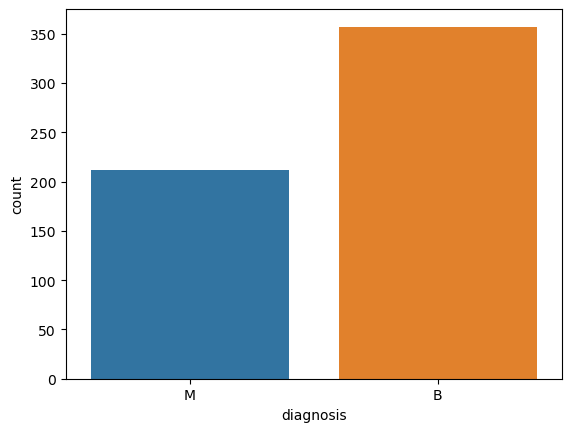

In [19]:
# visualization of count 
sns.countplot(x='diagnosis',data=df,label='count')
plt.show()

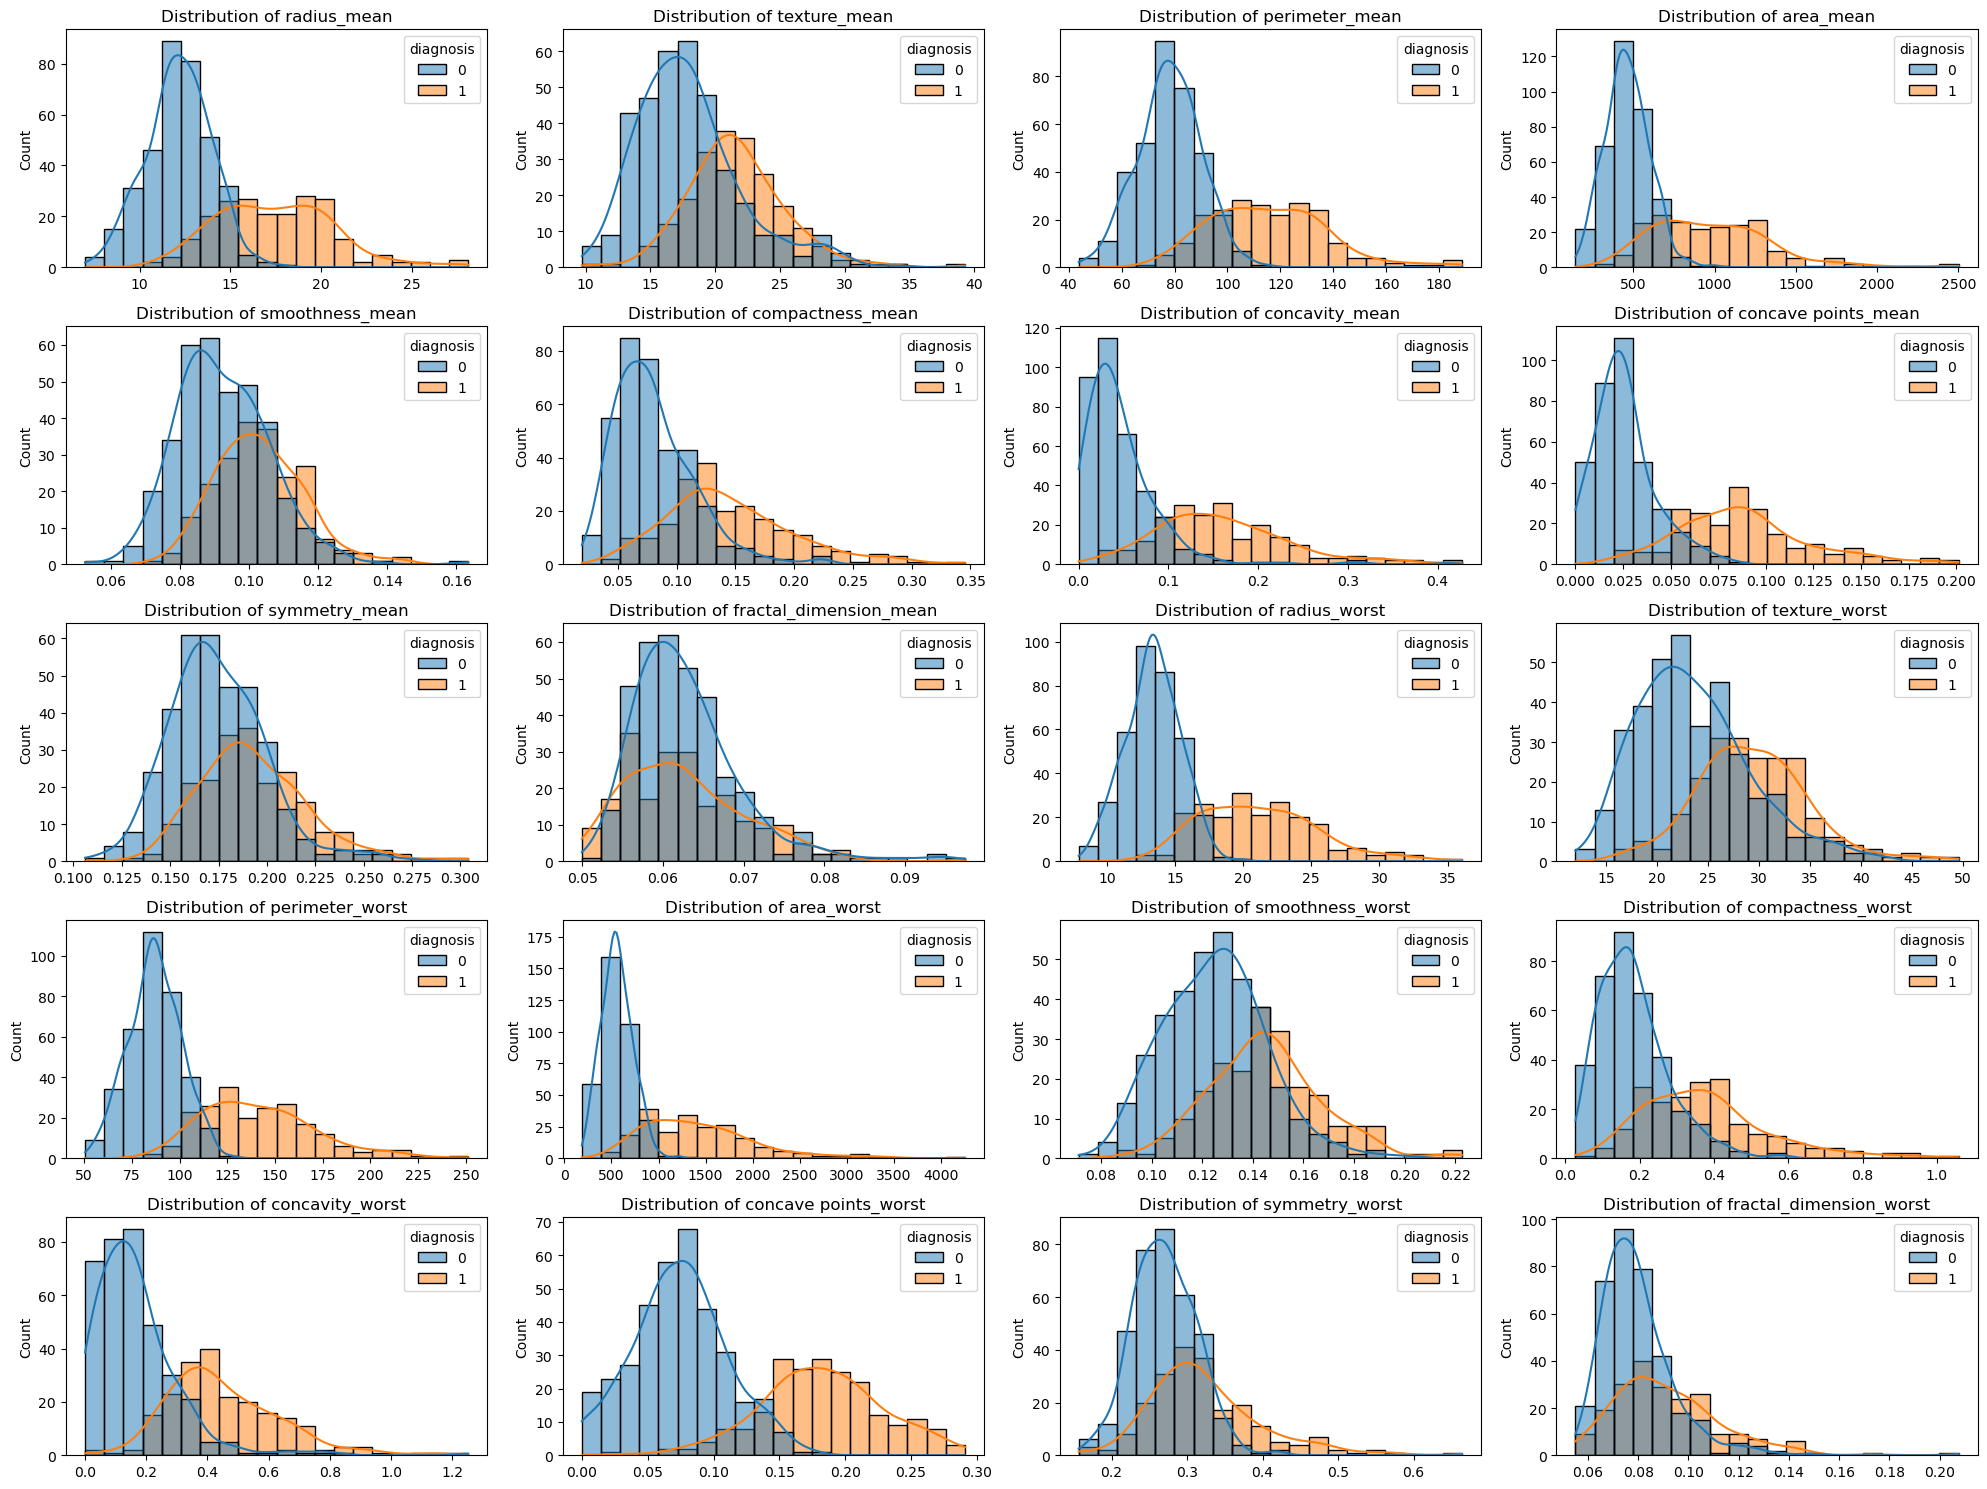

In [114]:
# Histogram to show variations for each tumor M=1 and B=0
parameters = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
              'smoothness_mean', 'compactness_mean', 'concavity_mean', 
              'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
              'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
              'smoothness_worst', 'compactness_worst', 'concavity_worst', 
              'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Plot histograms for each parameter with separate distributions for malignant and benign tumors
plt.figure(figsize=(20, 15))
for i, param in enumerate(parameters, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data=df, x=param, hue='diagnosis', kde=True, bins=20)
    plt.title(f'Distribution of {param}')
    plt.xlabel('')
plt.tight_layout()
plt.show()
warnings.filterwarnings("default")

In [20]:
df.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [99]:
# Encode categorical data values
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)


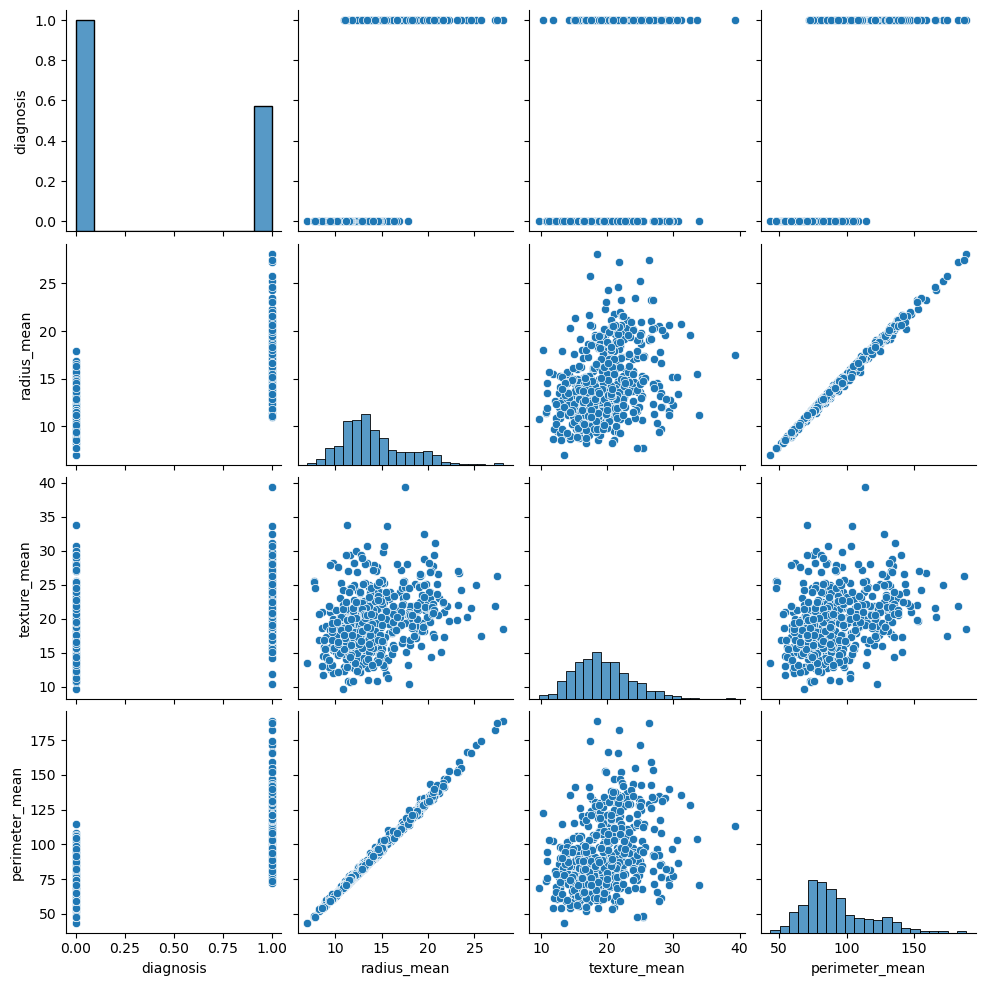

In [112]:
# Pairplot of catagorical data
warnings.filterwarnings("ignore")
columns_to_plot = df.columns[1:5].tolist() + [df.columns[1]]  # Adjust according to your columns/
sns.pairplot(df.iloc[:,1:5])
plt.show()

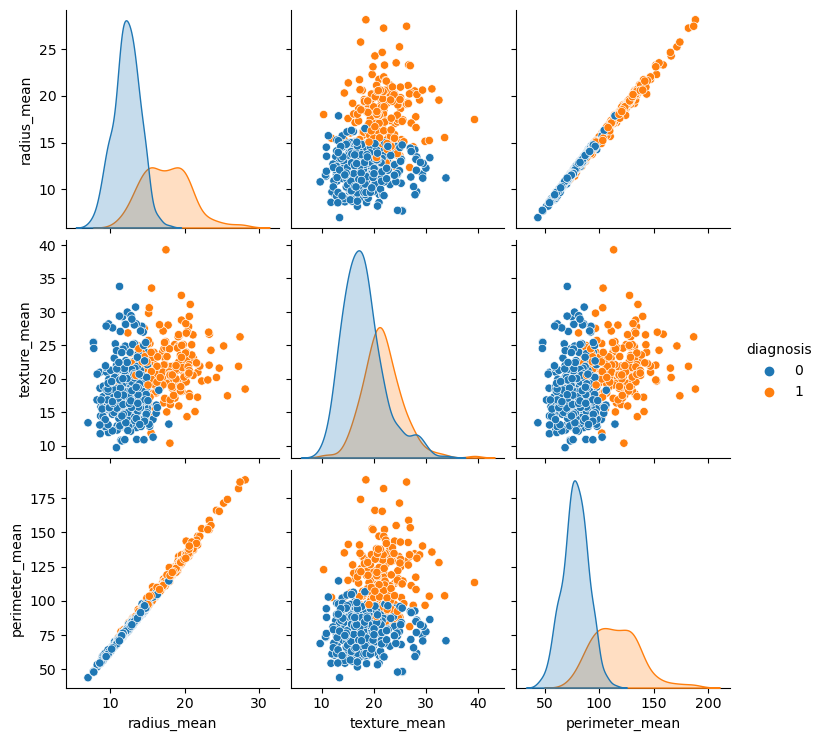

In [113]:
# BENIGN TUMOR(B=0) AND MALIGNANT TUMOR(M=1)
warnings.filterwarnings("ignore")
sns.pairplot(df.iloc[:,1:5],hue='diagnosis')
plt.show()

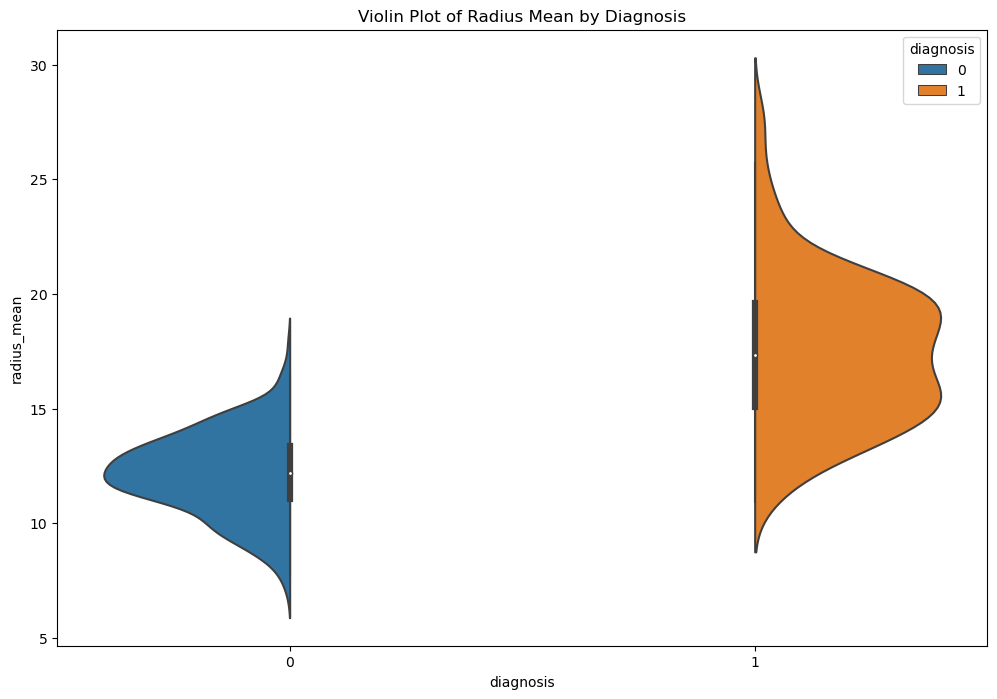

In [118]:
# Violin Plot to show relationship between Benign tumor(B=0) and Malignant tumor(M=1)
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='diagnosis', y='radius_mean', hue='diagnosis', split=True)
plt.title('Violin Plot of Radius Mean by Diagnosis')
plt.show()

In [36]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
# Correlation  of the columns
correlation_matrix=df.iloc[:,1:12].corr()

<Axes: >

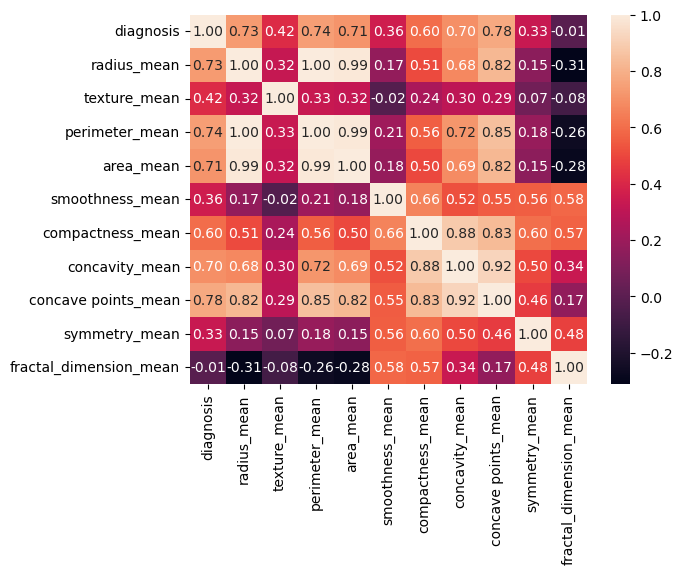

In [45]:
# Visualization of correlation
sns.heatmap(correlation_matrix,annot=True,fmt='.2f')

In [48]:
# Splitting data set into independent data set and dependent data set
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values


In [53]:
# Splitting data into 75% training and 25% testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [55]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

X_train

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.69592933,
        -0.36433881,  0.32349851],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.29277423,
        -1.45036679,  0.62563098],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.26255563,
         0.72504581, -0.51329768],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.78274313,
        -0.98806491, -0.69995543],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.36015587,
        -1.75887319, -1.56206114],
       [-0.74662205,  1.14066273, -0.72203706, ...,  0.47201917,
        -0.2860679 , -1.24094654]])

In [82]:
# Function for the models
def models(X_train,Y_train):
    
    # Check and encode labels if necessary
    if not np.issubdtype(Y_train.dtype, np.number):
        le = LabelEncoder()
        Y_train = le.fit_transform(Y_train)
        
#     Logistic Regression
    log=LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
#     Decision Tree
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train, Y_train)
    
#     Random forest classification
    forest=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
    forest.fit(X_train, Y_train)
    
#     Print the models accuracy on the training data
    print('[0]Logistic Regression Training Accuracy:',log.score(X_train,Y_train))
    print('[1]Decision Tree Classifier Training Accuracy:',tree.score(X_train,Y_train))
    print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train,Y_train))
    
    return log, tree, forest

In [83]:
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9953051643192489


In [89]:
# test model data accuracy on test data on confusion matrix
Y_test_encoded = le.transform(Y_test)
for i in range(len(model)):
    print("model",i)
    cm=confusion_matrix(Y_test_encoded, model[i].predict(X_test))

    TP=cm[0][0]
    TN=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]

    print(cm)
    print("Testing Accuracy=",(TP+TN)/(TP+TN+FN+FP))
    print()

model 0
[[86  4]
 [ 3 50]]
Testing Accuracy= 0.951048951048951

model 1
[[83  7]
 [ 2 51]]
Testing Accuracy= 0.9370629370629371

model 2
[[87  3]
 [ 2 51]]
Testing Accuracy= 0.965034965034965



In [94]:
# Another Way to get the metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_test=le.transform(Y_test)
for i in range(len(model)):
    print("Model",i)
    print(classification_report(y_test,model[i].predict(X_test)))
    print(accuracy_score(_test, model[i].predict(X_test)))
    print()

Model 0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model 1
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

Model 2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted av